In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumour/BrianTumour Data/test/cancer/y170 7.26.30 PM.jpg
/kaggle/input/brain-tumour/BrianTumour Data/test/cancer/y147 7.26.30 PM.jpg
/kaggle/input/brain-tumour/BrianTumour Data/test/cancer/y203 7.26.30 PM.jpg
/kaggle/input/brain-tumour/BrianTumour Data/test/cancer/y136 7.26.30 PM.jpg
/kaggle/input/brain-tumour/BrianTumour Data/test/cancer/y218 7.26.30 PM.jpg
/kaggle/input/brain-tumour/BrianTumour Data/test/cancer/y249 7.26.30 PM.jpg
/kaggle/input/brain-tumour/BrianTumour Data/test/cancer/y45 7.26.29 PM.jpg
/kaggle/input/brain-tumour/BrianTumour Data/test/cancer/y273 7.26.30 PM.jpg
/kaggle/input/brain-tumour/BrianTumour Data/test/cancer/y338 7.26.31 PM.jpg
/kaggle/input/brain-tumour/BrianTumour Data/test/cancer/y201 7.26.30 PM.jpg
/kaggle/input/brain-tumour/BrianTumour Data/test/cancer/y191 7.26.30 PM.jpg
/kaggle/input/brain-tumour/BrianTumour Data/test/cancer/y36 7.26.29 PM.jpg
/kaggle/input/brain-tumour/BrianTumour Data/test/cancer/y272 7.26.30 PM.jpg
/kaggle/input/

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator=ImageDataGenerator(rescale=1.0/255.)
test_generator=ImageDataGenerator(rescale=1.0/255.)

train_gen=train_generator.flow_from_directory(
    '/kaggle/input/brain-tumour/BrianTumour Data/train',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=2000
    )

test_gen=test_generator.flow_from_directory(
    '/kaggle/input/brain-tumour/BrianTumour Data/test',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20
    )

Found 2200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [29]:
val_generator=ImageDataGenerator(rescale=1.0/255.)

val_gen=val_generator.flow_from_directory(
    '/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=200
    )



Found 4600 images belonging to 2 classes.


In [30]:
val_gen.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

0.0


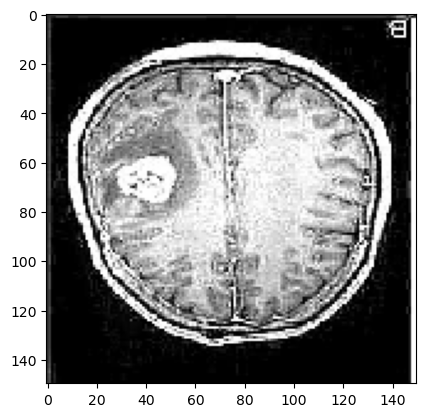

In [5]:
import matplotlib.pyplot as plt
print(train_gen.next()[1][0])
plt.imshow(train_gen.next()[0][0])
plt.show()

1.0


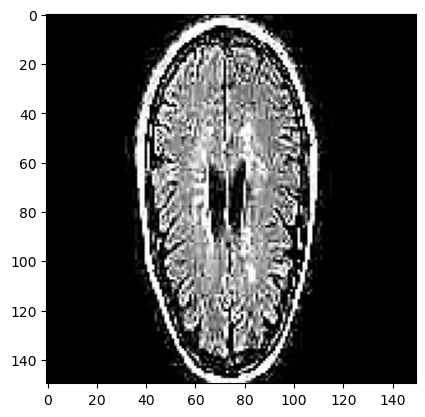

In [7]:
print(train_gen.next()[1][0])
plt.imshow(test_gen.next()[0][0])
plt.show()

In [33]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

model=Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [34]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [61]:
len(test_gen)

40

In [35]:
history=model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=20
)

Epoch 1/20
110/110 [==============================] - 11s 83ms/step - loss: 0.5619 - accuracy: 0.7523 - val_loss: 0.4655 - val_accuracy: 0.7738
Epoch 2/20
110/110 [==============================] - 8s 75ms/step - loss: 0.2769 - accuracy: 0.8795 - val_loss: 0.5100 - val_accuracy: 0.8175
Epoch 3/20
110/110 [==============================] - 8s 74ms/step - loss: 0.1500 - accuracy: 0.9464 - val_loss: 0.5769 - val_accuracy: 0.8300
Epoch 4/20
110/110 [==============================] - 8s 77ms/step - loss: 0.1033 - accuracy: 0.9632 - val_loss: 0.8147 - val_accuracy: 0.8213
Epoch 5/20
110/110 [==============================] - 8s 73ms/step - loss: 0.0432 - accuracy: 0.9850 - val_loss: 1.7943 - val_accuracy: 0.7925
Epoch 6/20
110/110 [==============================] - 8s 73ms/step - loss: 0.0358 - accuracy: 0.9891 - val_loss: 0.6896 - val_accuracy: 0.8550
Epoch 7/20
110/110 [==============================] - 8s 73ms/step - loss: 0.0161 - accuracy: 0.9968 - val_loss: 1.1076 - val_accuracy: 0.842

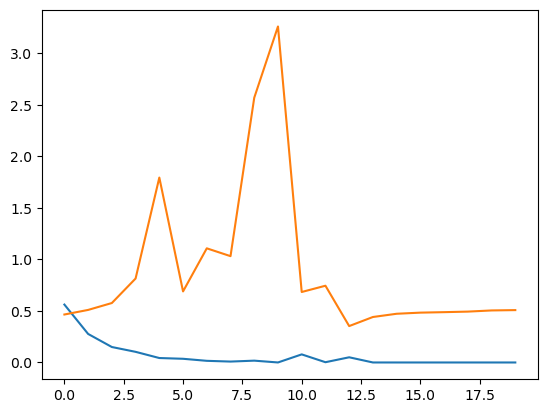

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

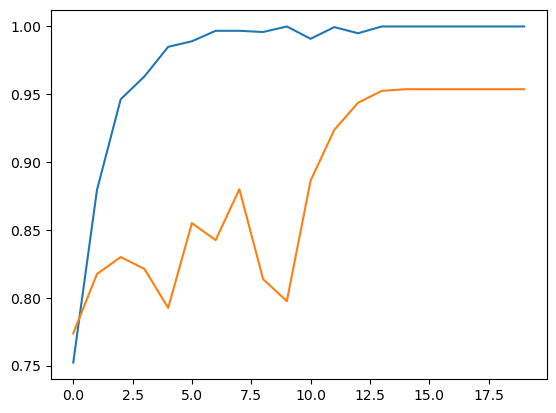

In [36]:
import pandas as pd
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()


In [88]:
from tensorflow.keras.utils import load_img, img_to_array

f=[]
for x in range(1000,1100):
    try:
        image=load_img(f'/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer ({x}).jpg', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        #image=image.reshape(1, 150, 150, 3)   also works
        image=np.expand_dims(image, axis=0)

        #plt.imshow(image)

        f.append(round(model.predict(image)[0][0]))
        print(x)
    except:
        image=load_img(f'/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer ({x}).JPG', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        #image=image.reshape(1, 150, 150, 3)   also works
        image=np.expand_dims(image, axis=0)

        #plt.imshow(image)

        f.append(round(model.predict(image)[0][0]))
        print(x)
    

1/1 [==============================] - 0s 23ms/step
1000
1/1 [==============================] - 0s 19ms/step
1001
1/1 [==============================] - 0s 20ms/step
1002
1/1 [==============================] - 0s 19ms/step
1003
1/1 [==============================] - 0s 20ms/step
1004
1/1 [==============================] - 0s 21ms/step
1005
1/1 [==============================] - 0s 21ms/step
1006
1/1 [==============================] - 0s 22ms/step
1007
1/1 [==============================] - 0s 20ms/step
1008
1/1 [==============================] - 0s 20ms/step
1009
1/1 [==============================] - 0s 20ms/step
1010
1/1 [==============================] - 0s 21ms/step
1011
1/1 [==============================] - 0s 20ms/step
1012
1/1 [==============================] - 0s 21ms/step
1013
1/1 [==============================] - 0s 26ms/step
1014
1/1 [==============================] - 0s 21ms/step
1015
1/1 [==============================] - 0s 24ms/step
1016
1/1 [==========================

In [104]:
print("The accuracy on unseen data is: ",((len(f)-f.count(1))/len(f))*100)


The accuracy on unseen data is:  98.0


In [106]:
f=[]
for x in range(1,2000):
    try:
        image=load_img(f'/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  ({x}).jpg', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        #image=image.reshape(1, 150, 150, 3)   also works
        image=np.expand_dims(image, axis=0)

        #plt.imshow(image)

        f.append(round(model.predict(image)[0][0]))
        print(x)
    except:
        pass
    

1/1 [==============================] - 0s 21ms/step
1
1/1 [==============================] - 0s 20ms/step
2
1/1 [==============================] - 0s 20ms/step
3
1/1 [==============================] - 0s 19ms/step
4
1/1 [==============================] - 0s 22ms/step
5
1/1 [==============================] - 0s 24ms/step
6
1/1 [==============================] - 0s 22ms/step
7
1/1 [==============================] - 0s 20ms/step
8
1/1 [==============================] - 0s 20ms/step
9
1/1 [==============================] - 0s 20ms/step
10
1/1 [==============================] - 0s 19ms/step
11
1/1 [==============================] - 0s 21ms/step
12
1/1 [==============================] - 0s 21ms/step
13
1/1 [==============================] - 0s 22ms/step
14
1/1 [==============================] - 0s 19ms/step
15
1/1 [==============================] - 0s 21ms/step
16
1/1 [==============================] - 0s 20ms/step
17
1/1 [==============================] - 0s 22ms/step
18
1/1 [==============

In [108]:
print("The accuracy on unseen data is: ",((len(f)-f.count(0))/len(f))*100)


The accuracy on unseen data is:  89.764174611139


In [74]:
pred_generator=ImageDataGenerator(rescale=1.0/255)
pred_gen=pred_generator.flow_from_directory(
    '/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set',
    class_mode='binary',
    target_size=(150,150)
)

Found 4600 images belonging to 2 classes.


In [76]:
evaluation=model.evaluate(pred_gen)
evaluation

144/144 [==============================] - 41s 286ms/step - loss: 1.5682 - accuracy: 0.8693


[1.5681560039520264, 0.8693478107452393]

In [114]:
model.save('/kaggle/working/BrainTumourClassifier.h5')

In [4]:
new_model = tf.keras.models.load_model('/kaggle/input/fgergd/BrainTumourClassifier.h5')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [37]:
dummy = iter(val_gen).next()

In [11]:
import numpy as np

In [33]:
i=5
img=dummy[0][i]
print(f'Predicted: {new_model.predict(np.expand_dims(img, axis=0)).round()[0][0]}')
print(f'Actual: {dummy[1][i]}')


1/1 [==============================] - 0s 32ms/step
Predicted: 1.0
Actual: 0.0


In [38]:
from sklearn.metrics import accuracy_score
predicted = new_model.predict(dummy[0]).round()
actual = dummy[1]
accuracy_score(actual,predicted)

125/125 [==============================] - 16s 125ms/step


0.8675

In [35]:
val_generator=ImageDataGenerator(rescale=1.0/255.)

val_gen=val_generator.flow_from_directory(
    '/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=4000
    )


Found 4600 images belonging to 2 classes.


In [26]:
actual

array([0., 1., 1., ..., 0., 1., 0.], dtype=float32)